In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, roc_curve, auc, accuracy_score, recall_score, precision_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
# Veri setini özellikler ve hedef değişken olarak ayır
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# KNN modelini eğitip ve test ediyoruz
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
knn_predictions = knn_clf.predict(X_test)
knn_probs = knn_clf.predict_proba(X_test)[:, 1]


In [6]:
# Doğruluk değerlerini
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions)

In [7]:
# SGDClassifier modelini eğitip ve test ediyoruz
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_predictions = sgd_clf.predict(X_test)

In [8]:
# Random Forest Classifier modelini eğitip ve test ediyoruz
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
rf_predictions = rf_clf.predict(X_test)

In [9]:
# Doğruluk değerlerini
sgd_accuracy = accuracy_score(y_test, sgd_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

In [10]:
# Precision/Recall Curve ve ROC Curve için değerleri hesaplıyoruz
sgd_probs = sgd_clf.decision_function(X_test)
sgd_precision, sgd_recall, _ = precision_recall_curve(y_test, sgd_probs)
sgd_auc_pr = auc(sgd_recall, sgd_precision)

rf_probs = rf_clf.predict_proba(X_test)[:, 1]
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_probs)
rf_auc_pr = auc(rf_recall, rf_precision)

sgd_fpr, sgd_tpr, _ = roc_curve(y_test, sgd_probs)
sgd_auc_roc = auc(sgd_fpr, sgd_tpr)

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc_roc = auc(rf_fpr, rf_tpr)

knn_precision, knn_recall, _ = precision_recall_curve(y_test, knn_probs)
knn_auc_pr = auc(knn_recall, knn_precision)

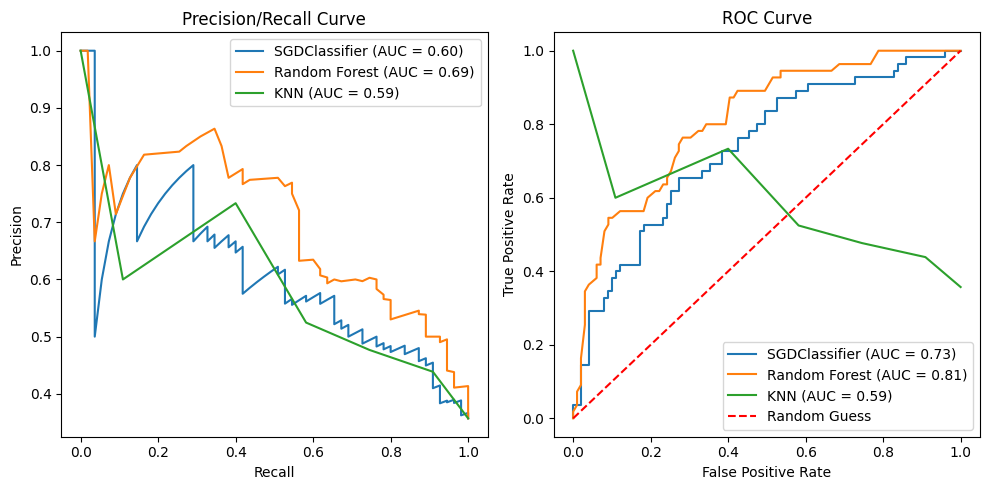

In [11]:
# Precision/Recall Curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(sgd_recall, sgd_precision, label="SGDClassifier (AUC = {:.2f})".format(sgd_auc_pr))
plt.plot(rf_recall, rf_precision, label="Random Forest (AUC = {:.2f})".format(rf_auc_pr))
plt.plot(knn_recall, knn_precision, label="KNN (AUC = {:.2f})".format(knn_auc_pr))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision/Recall Curve")
plt.legend()


# ROC Curve
plt.subplot(1, 2, 2)
plt.plot(sgd_fpr, sgd_tpr, label="SGDClassifier (AUC = {:.2f})".format(sgd_auc_roc))
plt.plot(rf_fpr, rf_tpr, label="Random Forest (AUC = {:.2f})".format(rf_auc_roc))
plt.plot(knn_recall, knn_precision, label="KNN (AUC = {:.2f})".format(knn_auc_pr))
plt.plot([0, 1], [0, 1], linestyle="--", color='r', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
# En uygun threshold değerini belirleme
optimal_threshold_sgd = sgd_recall[np.argmax(np.abs(sgd_precision - sgd_recall))]
optimal_threshold_rf = rf_recall[np.argmax(np.abs(rf_precision - rf_recall))]
optimal_threshold_knn = knn_recall[np.argmax(np.abs(knn_precision - knn_recall))]
print("Optimal Threshold for SGDClassifier:", optimal_threshold_sgd)
print("Optimal Threshold for Random Forest Classifier:", optimal_threshold_rf)
print("Optimal Threshold for KNN Classifier:", optimal_threshold_knn)

Optimal Threshold for SGDClassifier: 0.0
Optimal Threshold for Random Forest Classifier: 0.0
Optimal Threshold for KNN Classifier: 0.0


In [13]:
# Model Performansının Yorumluyoruz
print("SGDClassifier Doğruluk Değeri:", sgd_accuracy)
print("Random Forest Classifier Doğruluk Değeri:", rf_accuracy)
print("KNN Doğruluk Değeri:", knn_accuracy)

print("SGDClassifier Recall Değeri:", sgd_recall)
print("Random Forest Classifier Recall Değeri:", rf_recall)
print("KNN Recall Değeri:", knn_recall)

print("SGDClassifier Precision Değeri:", sgd_precision)
print("Random Forest Classifier Precision Değeri:", rf_precision)
print("KNN Precision Değeri:", knn_precision)


SGDClassifier Doğruluk Değeri: 0.5064935064935064
Random Forest Classifier Doğruluk Değeri: 0.7207792207792207
KNN Doğruluk Değeri: 0.6623376623376623
SGDClassifier Recall Değeri: [1.         1.         1.         1.         1.         0.98181818
 0.98181818 0.98181818 0.98181818 0.98181818 0.98181818 0.98181818
 0.98181818 0.98181818 0.98181818 0.98181818 0.96363636 0.96363636
 0.96363636 0.94545455 0.94545455 0.92727273 0.92727273 0.92727273
 0.92727273 0.92727273 0.92727273 0.92727273 0.92727273 0.92727273
 0.92727273 0.92727273 0.90909091 0.90909091 0.90909091 0.90909091
 0.90909091 0.90909091 0.90909091 0.90909091 0.90909091 0.90909091
 0.90909091 0.90909091 0.90909091 0.89090909 0.89090909 0.89090909
 0.89090909 0.87272727 0.87272727 0.87272727 0.87272727 0.87272727
 0.87272727 0.85454545 0.83636364 0.83636364 0.83636364 0.83636364
 0.81818182 0.8        0.8        0.8        0.78181818 0.78181818
 0.78181818 0.76363636 0.76363636 0.76363636 0.76363636 0.74545455
 0.72727273 0.72

In [14]:
# SGDClassifier için threshold uygulama
sgd_threshold_predictions = (sgd_probs > optimal_threshold_sgd).astype(int)

# Random Forest için threshold uygulama
rf_threshold_predictions = (rf_probs > optimal_threshold_rf).astype(int)

# KNN için threshold uygulama
knn_threshold_predictions = (knn_probs > optimal_threshold_knn).astype(int)

# Performansı değerlendirme
sgd_threshold_accuracy = accuracy_score(y_test, sgd_threshold_predictions)
rf_threshold_accuracy = accuracy_score(y_test, rf_threshold_predictions)
knn_threshold_accuracy = accuracy_score(y_test, knn_threshold_predictions)

print("SGDClassifier Doğruluk Değeri (Threshold Uygulandı):", sgd_threshold_accuracy)
print("Random Forest Classifier Doğruluk Değeri (Threshold Uygulandı):", rf_threshold_accuracy)
print("KNN Doğruluk Değeri (Threshold Uygulandı):", knn_threshold_accuracy)


SGDClassifier Doğruluk Değeri (Threshold Uygulandı): 0.5064935064935064
Random Forest Classifier Doğruluk Değeri (Threshold Uygulandı): 0.37662337662337664
KNN Doğruluk Değeri (Threshold Uygulandı): 0.551948051948052
